In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load datasets
matches = pd.read_csv("/Users/jayes/Desktop/data/matches.csv")
deliveries = pd.read_csv("/Users/jayes/Desktop/data/deliveries.csv")


Matplotlib is building the font cache; this may take a moment.


In [6]:
# -----------------------
# 🔄 DATA PREPROCESSING
# -----------------------

# Clean column names
matches.columns = matches.columns.str.strip().str.lower()
deliveries.columns = deliveries.columns.str.strip().str.lower()

# Convert 'season' to int
matches['season'] = pd.to_numeric(matches['season'], errors='coerce')
matches.dropna(subset=['season'], inplace=True)
matches['season'] = matches['season'].astype(int)

# Drop null match winners (e.g., abandoned)
matches = matches[~matches['winner'].isna()]

# Clean extra spaces
for col in ['team1', 'team2', 'winner']:
    matches[col] = matches[col].str.strip()
for col in ['batting_team', 'bowling_team', 'batter', 'bowler']:
    deliveries[col] = deliveries[col].str.strip()

# Filter for seasons 2020 to 2024
matches_filtered = matches[matches["season"].between(2020, 2024)]
match_ids = matches_filtered["id"].unique()
deliveries_filtered = deliveries[deliveries["match_id"].isin(match_ids)]

# Merge deliveries with matches
deliveries_merged = deliveries_filtered.merge(
    matches_filtered[['id', 'season', 'venue', 'winner']],
    left_on='match_id',
    right_on='id',
    how='left'
)

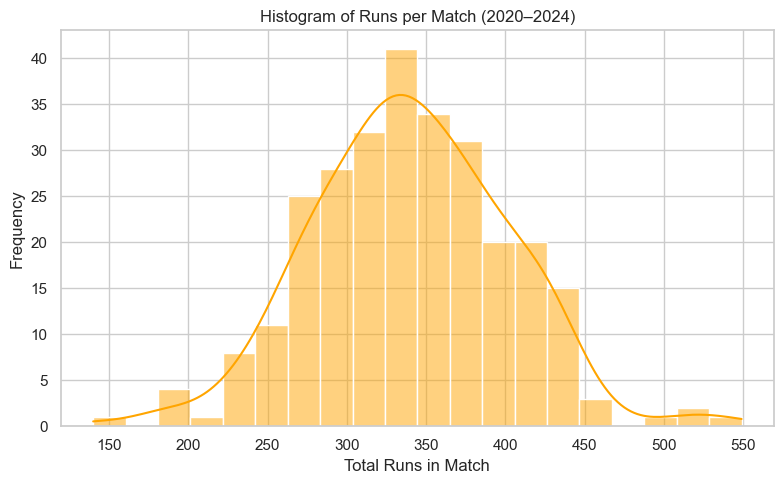

In [7]:
# -------------------------------
# 📊 ANALYSIS + VISUALIZATIONS
# -------------------------------

# 1. 🧃 Histogram of total runs in matches
runs_per_match = deliveries_merged.groupby('match_id')['total_runs'].sum()
plt.figure(figsize=(8, 5))
sns.histplot(runs_per_match, bins=20, kde=True, color='orange')
plt.title("Histogram of Runs per Match (2020–2024)")
plt.xlabel("Total Runs in Match")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

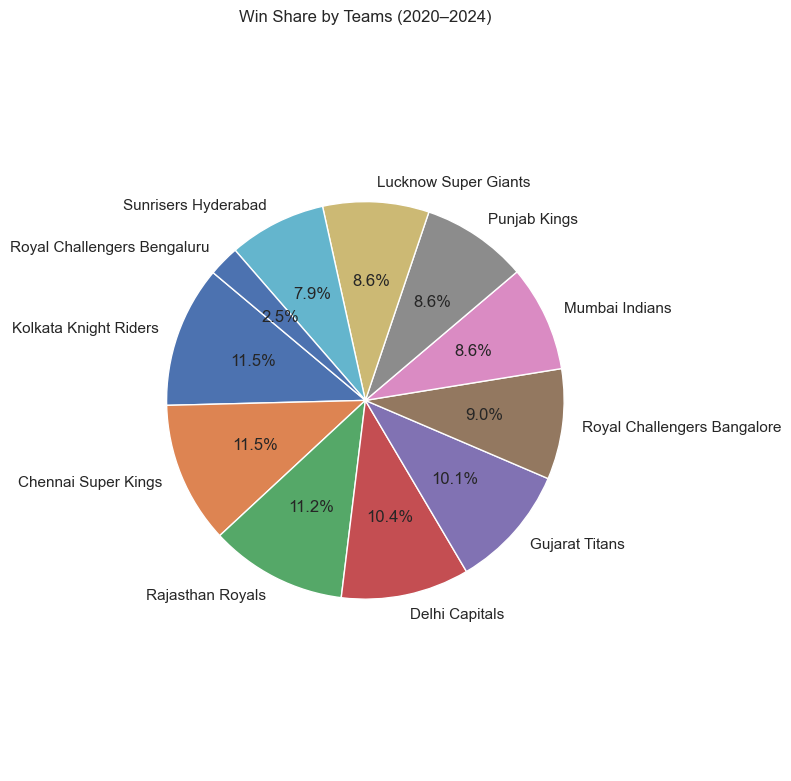

In [8]:
# 2. 🥧 Pie Chart – Win share
win_share = matches_filtered['winner'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(win_share, labels=win_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Win Share by Teams (2020–2024)")
plt.axis('equal')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

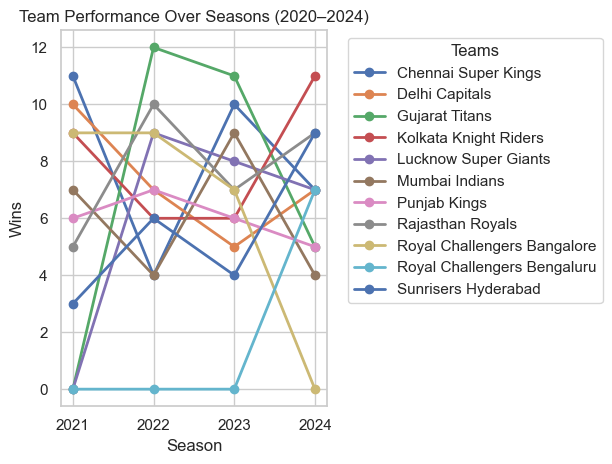

In [9]:
# 3. 📈 Team performance over seasons (line chart)
team_performance = matches_filtered.groupby(['season', 'winner']).size().reset_index(name='wins')
pivot_perf = team_performance.pivot(index='season', columns='winner', values='wins').fillna(0)
plt.figure(figsize=(12, 6))
pivot_perf.plot(marker='o', linewidth=2)
plt.title("Team Performance Over Seasons (2020–2024)")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\jayes\AppData\Local\Temp\ipykernel_17696\580725427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_runs_season, x='season', y='total_runs', palette='Blues_d')


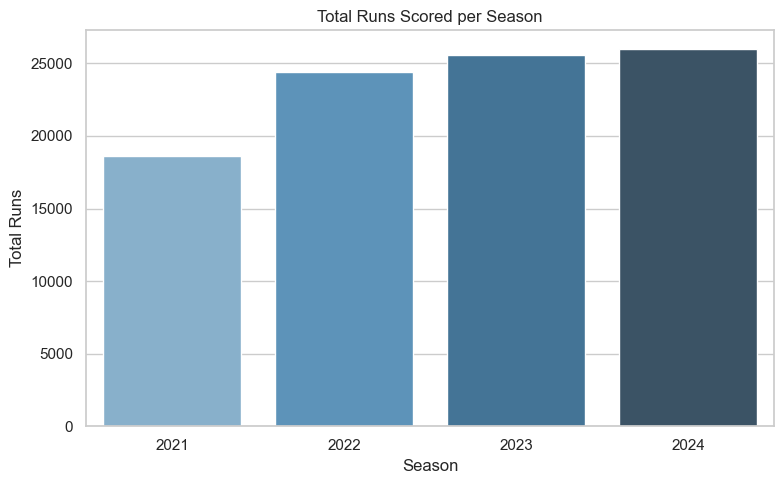

In [10]:
# --- Keep previous bar charts ---
# 4. Total Runs per Season
total_runs_season = deliveries_merged.groupby('season')['total_runs'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=total_runs_season, x='season', y='total_runs', palette='Blues_d')
plt.title("Total Runs Scored per Season")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

C:\Users\jayes\AppData\Local\Temp\ipykernel_17696\3454368898.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_wickets, x='wickets', y='bowler', palette='viridis')


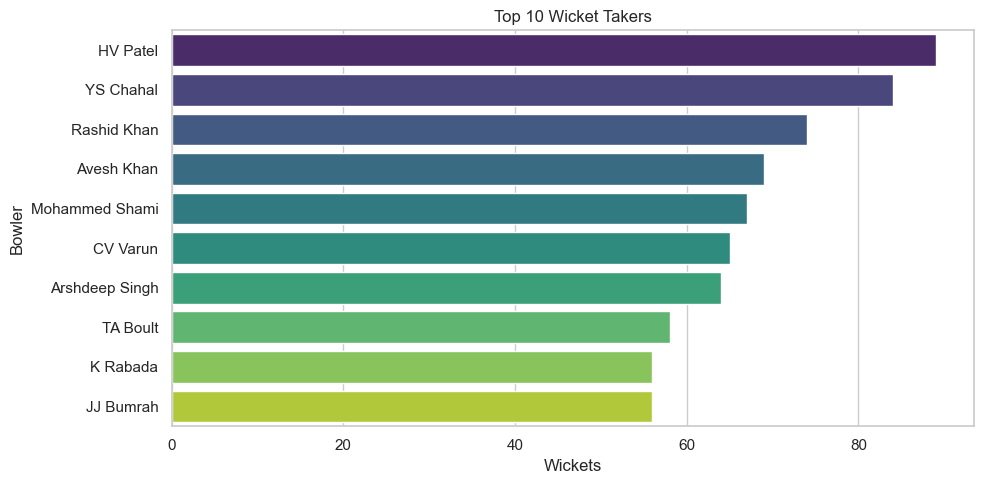

In [11]:
# 5. Top 10 Wicket Takers
wicket_kinds = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets_df = deliveries_merged[deliveries_merged['dismissal_kind'].isin(wicket_kinds)]
most_wickets = wickets_df['bowler'].value_counts().head(10).reset_index()
most_wickets.columns = ['bowler', 'wickets']
plt.figure(figsize=(10, 5))
sns.barplot(data=most_wickets, x='wickets', y='bowler', palette='viridis')
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

C:\Users\jayes\AppData\Local\Temp\ipykernel_17696\659926905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_wins, x='wins', y='team', palette='crest')


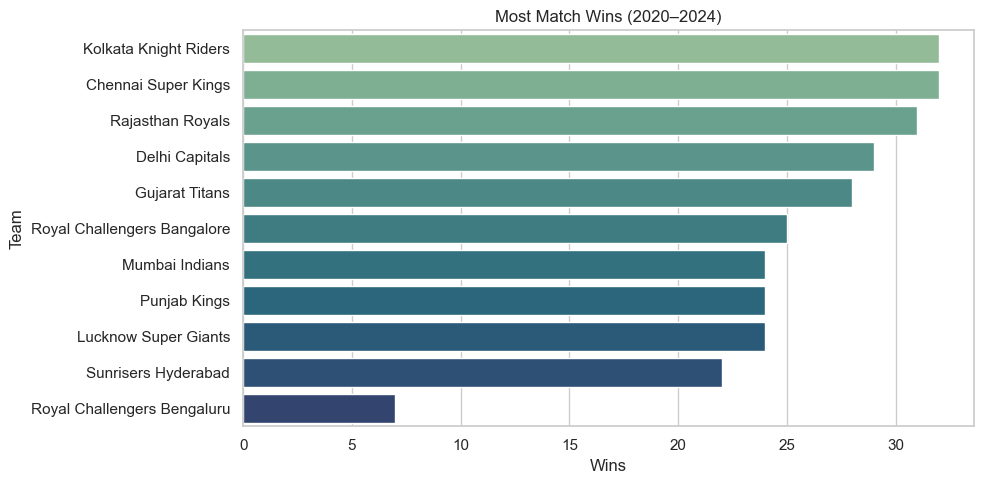

In [12]:
# 6. Most Wins
team_wins = matches_filtered['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']
plt.figure(figsize=(10, 5))
sns.barplot(data=team_wins, x='wins', y='team', palette='crest')
plt.title("Most Match Wins (2020–2024)")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


C:\Users\jayes\AppData\Local\Temp\ipykernel_17696\1933745085.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_win_percent.sort_values('win_percentage', ascending=False), x='win_percentage', y='team', palette='coolwarm')


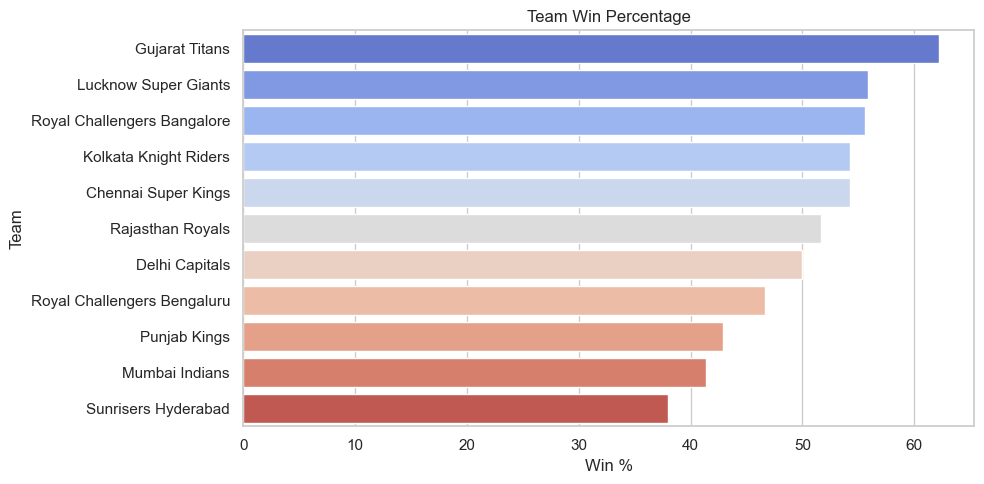

In [13]:
# 7. Win Percentage
team1 = matches_filtered[['season', 'team1']].rename(columns={'team1': 'team'})
team2 = matches_filtered[['season', 'team2']].rename(columns={'team2': 'team'})
total_matches = pd.concat([team1, team2]).groupby('team').size().reset_index(name='matches_played')
team_win_percent = pd.merge(team_wins, total_matches, on='team')
team_win_percent['win_percentage'] = (team_win_percent['wins'] / team_win_percent['matches_played']) * 100
plt.figure(figsize=(10, 5))
sns.barplot(data=team_win_percent.sort_values('win_percentage', ascending=False), x='win_percentage', y='team', palette='coolwarm')
plt.title("Team Win Percentage")
plt.xlabel("Win %")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

C:\Users\jayes\AppData\Local\Temp\ipykernel_17696\3661660288.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fifty_percent, x='fifty_percent', y='batter', palette='rocket')


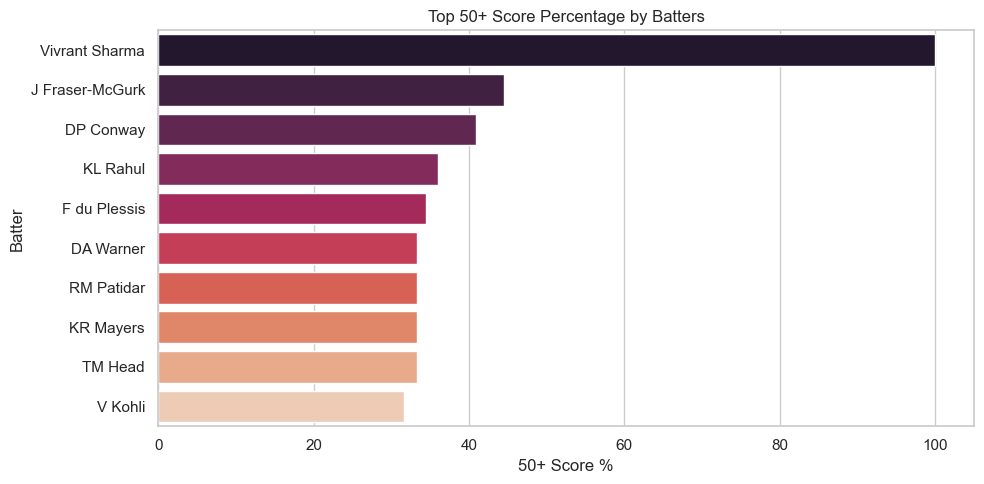

In [14]:
# 8. 50+ Score Percentage
fifties = deliveries_merged.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
fifties['is_50_plus'] = fifties['batsman_runs'] >= 50
fifty_counts = fifties.groupby('batter')['is_50_plus'].sum()
match_counts = fifties.groupby('batter').size()
fifty_percent = (fifty_counts / match_counts * 100).sort_values(ascending=False).head(10).reset_index()
fifty_percent.columns = ['batter', 'fifty_percent']
plt.figure(figsize=(10, 5))
sns.barplot(data=fifty_percent, x='fifty_percent', y='batter', palette='rocket')
plt.title("Top 50+ Score Percentage by Batters")
plt.xlabel("50+ Score %")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

C:\Users\jayes\AppData\Local\Temp\ipykernel_17696\127706374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_wickets, x='wickets', y='team', palette='magma')


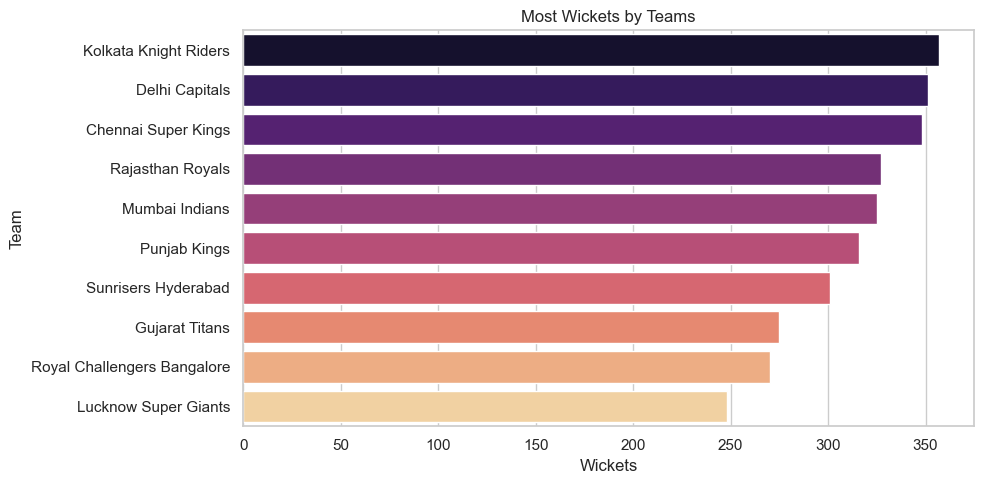

In [15]:
# 9. Most Wickets by Team
team_wickets = wickets_df.groupby('bowling_team').size().sort_values(ascending=False).head(10).reset_index()
team_wickets.columns = ['team', 'wickets']
plt.figure(figsize=(10, 5))
sns.barplot(data=team_wickets, x='wickets', y='team', palette='magma')
plt.title("Most Wickets by Teams")
plt.xlabel("Wickets")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

C:\Users\jayes\AppData\Local\Temp\ipykernel_17696\2738666561.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_runs, x='runs', y='team', palette='summer')


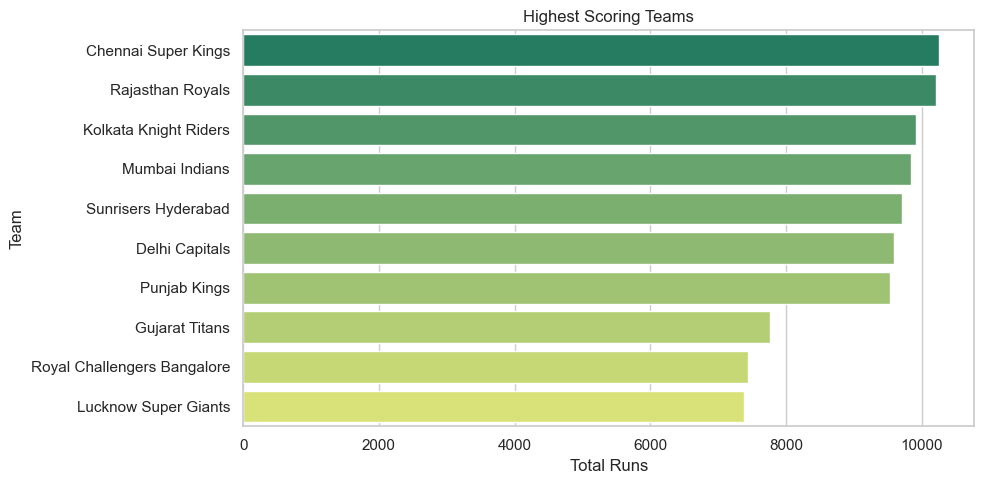

In [16]:
# 10. Highest Run Scoring Teams
team_runs = deliveries_merged.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).head(10).reset_index()
team_runs.columns = ['team', 'runs']
plt.figure(figsize=(10, 5))
sns.barplot(data=team_runs, x='runs', y='team', palette='summer')
plt.title("Highest Scoring Teams")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

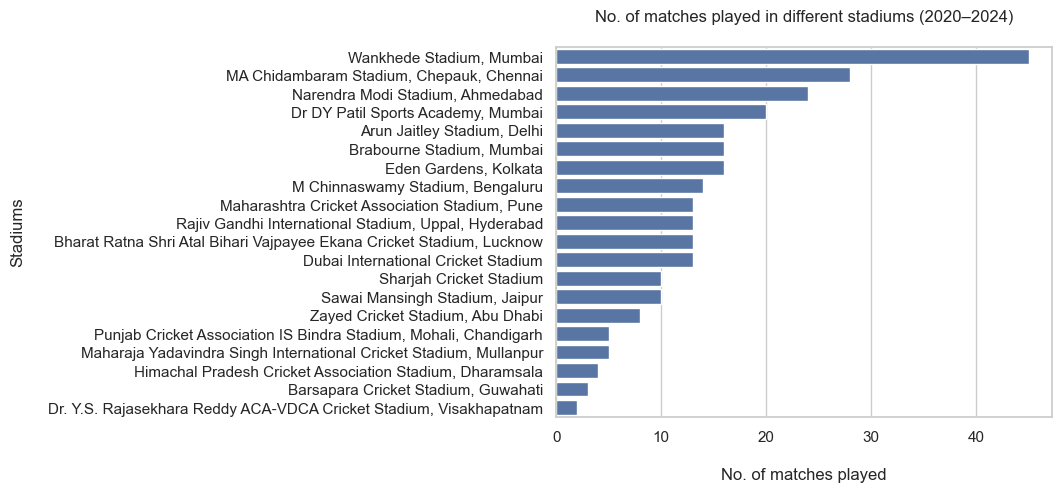

In [17]:
# Filter matches between 2020 and 2024
matches['season'] = matches['season'].astype(str).str.extract(r'(\d{4})').astype(int)
filtered_matches = matches[matches['season'].between(2020, 2024)]

# Plot number of matches played in different stadiums (2020–2024)
sns.countplot(y='venue', data=filtered_matches, order=filtered_matches['venue'].value_counts().index)
plt.title('No. of matches played in different stadiums (2020–2024)\n')
plt.xlabel('\nNo. of matches played')
plt.ylabel('Stadiums\n')
plt.show()


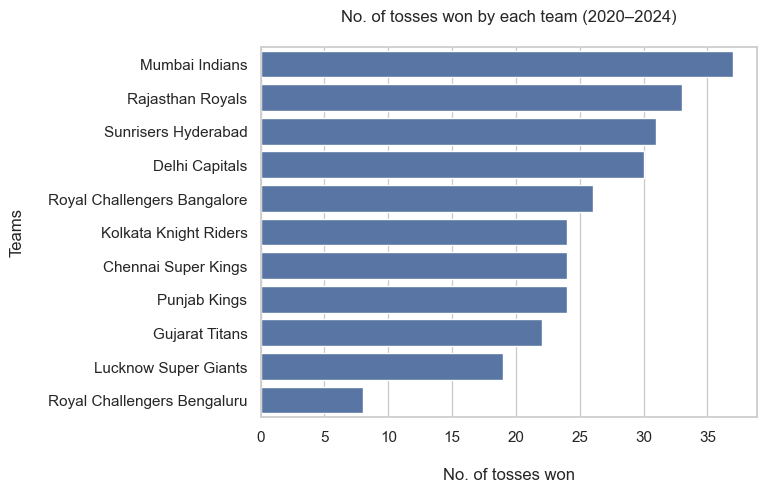

In [18]:
# Plot to visualise the no. of tosses won by each team
# Toss wins from 2020 to 2024
filtered_matches = matches[matches['season'].between(2020, 2024)]
toss = filtered_matches['toss_winner'].value_counts()

# Plot toss wins
fig, ax = plt.subplots()
ax.set_title('No. of tosses won by each team (2020–2024)\n')
sns.barplot(y=toss.index, x=toss.values, orient='h')
plt.xlabel('\nNo. of tosses won')
plt.ylabel('Teams\n')
plt.show()


In [19]:
# Filter matches between 2020 and 2024
filtered_matches = matches[matches['season'].between(2020, 2024)]

# Top 10 Player of the Match winners
mom = filtered_matches['player_of_match'].value_counts().head(10)
mom


player_of_match
RD Gaikwad       8
Shubman Gill     8
JC Buttler       7
RA Jadeja        7
SP Narine        6
KL Rahul         6
Kuldeep Yadav    6
F du Plessis     6
CV Varun         5
MP Stoinis       5
Name: count, dtype: int64

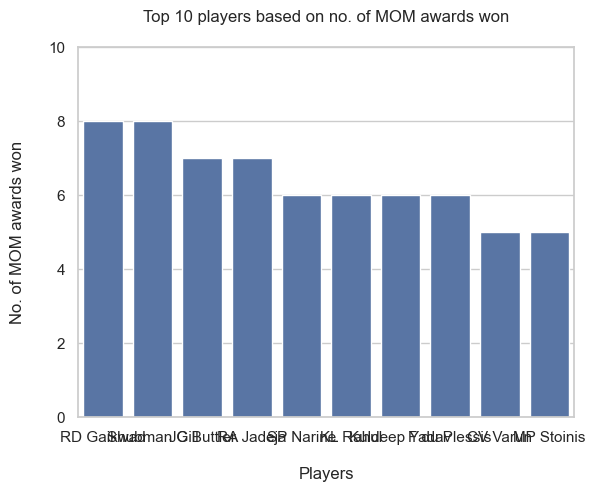

In [20]:
# Plot to visualise the top 10 players based on the no. of MOM awards won
fig, ax=plt.subplots()
ax.set_ylim([0,10])
ax.set_title('Top 10 players based on no. of MOM awards won\n')
sns.barplot(x=mom.index, y=mom, orient='v')
plt.ylabel('No. of MOM awards won\n')
plt.xlabel('\nPlayers')
plt.show()

In [21]:
# Filter matches between 2020 and 2024
filtered_matches = matches[matches['season'].between(2020, 2024)]

# Number of matches won by each team
winners = filtered_matches['winner'].value_counts()
winners


winner
Kolkata Knight Riders          32
Chennai Super Kings            32
Rajasthan Royals               31
Delhi Capitals                 29
Gujarat Titans                 28
Royal Challengers Bangalore    25
Mumbai Indians                 24
Punjab Kings                   24
Lucknow Super Giants           24
Sunrisers Hyderabad            22
Royal Challengers Bengaluru     7
Name: count, dtype: int64

In [23]:
# Plot to visualise the no. of matches won by each team
data=matches['winner'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,120])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of matches won by each team\n')
plt.xlabel("\nNo. of matches won")
plt.ylabel('Teams\n')
plt.show()

KeyboardInterrupt: 